# Ngoc Ha
# STAT 453
# Lab 4

In [70]:
library(readxl)
library(fitdistrplus)

## 1. pgatour2006.xlsx analysis

### (1a) Summarize

In [10]:
pga <- read_excel('pgatour2006.xlsx')

In [11]:
str(pga)

Classes 'tbl_df', 'tbl' and 'data.frame':	196 obs. of  11 variables:
 $ Name              : chr  "Aaron Baddeley" "Adam Scott" "Alex Aragon" "Alex Cejka" ...
 $ PrizeMoney        : num  60661 262045 3635 17516 16683 ...
 $ AveDrivingDistance: num  288 301 303 289 288 ...
 $ DrivingAccuracy   : num  60.7 62 51.1 66.4 63.2 ...
 $ GIR               : num  58.3 69.1 59.1 67.7 64 ...
 $ PuttingAverage    : num  1.75 1.77 1.79 1.78 1.76 ...
 $ BirdieConversion  : num  31.4 30.4 29.9 29.3 29.3 ...
 $ SandSaves         : num  54.8 53.6 37.9 45.1 52.4 ...
 $ Scrambling        : num  59.4 57.9 50.8 54.8 57.1 ...
 $ BounceBack        : num  19.3 19.4 16.8 17.1 18.2 ...
 $ PuttsPerRound     : num  28 29.3 29.2 29.5 28.9 ...


#### 10% trimmed mean

In [34]:
sapply(pga[,2:11], mean, trim = 0.1)

[1] "10% trimmed mean"

PrizeMoney AveDrivingDistance    DrivingAccuracy                GIR 
      40027.215190         289.308861          63.312785          65.269367 
    PuttingAverage   BirdieConversion          SandSaves         Scrambling 
          1.779329          29.014620          48.979937          57.500886 
        BounceBack      PuttsPerRound 
         19.567658          29.190253

#### Standard deviation

In [35]:
sapply(pga[,2:11], sd)

PrizeMoney AveDrivingDistance    DrivingAccuracy                GIR 
      6.390295e+04       8.730509e+00       5.413023e+00       2.722364e+00 
    PuttingAverage   BirdieConversion          SandSaves         Scrambling 
      2.472813e-02       2.206556e+00       5.828313e+00       3.162257e+00 
        BounceBack      PuttsPerRound 
      2.806113e+00       4.417023e-01

#### Summary

In [37]:
summary(pga[,2:11])

   PrizeMoney     AveDrivingDistance DrivingAccuracy      GIR       
 Min.   :  2240   Min.   :265.9      Min.   :49.75   Min.   :56.87  
 1st Qu.: 17369   1st Qu.:283.6      1st Qu.:59.76   1st Qu.:63.52  
 Median : 36645   Median :288.2      Median :63.24   Median :65.36  
 Mean   : 50891   Mean   :289.5      Mean   :63.38   Mean   :65.19  
 3rd Qu.: 57915   3rd Qu.:295.5      3rd Qu.:66.97   3rd Qu.:66.77  
 Max.   :662771   Max.   :319.6      Max.   :78.43   Max.   :74.15  
 PuttingAverage  BirdieConversion   SandSaves       Scrambling   
 Min.   :1.712   Min.   :23.17    Min.   :33.91   Min.   :49.02  
 1st Qu.:1.763   1st Qu.:27.51    1st Qu.:45.13   1st Qu.:55.26  
 Median :1.778   Median :29.01    Median :48.66   Median :57.65  
 Mean   :1.780   Mean   :28.98    Mean   :48.97   Mean   :57.49  
 3rd Qu.:1.796   3rd Qu.:30.55    3rd Qu.:52.87   3rd Qu.:59.46  
 Max.   :1.851   Max.   :35.66    Max.   :63.64   Max.   :66.45  
   BounceBack    PuttsPerRound  
 Min.   :12.29   Min. 

### (1b)

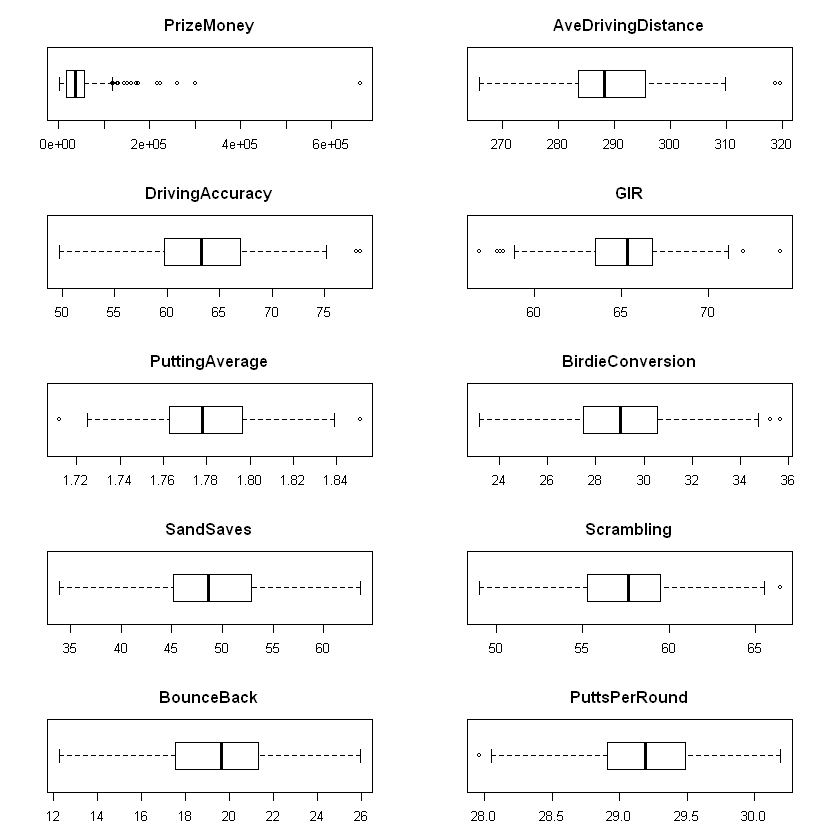

In [66]:
j <- 2
par(mfrow = c(5,2), mar = c(3,3,3,3))
for (i in pga[,2:11]) {
    boxplot(i, horizontal = T, main = names(pga)[j])
    j <- j+1
}

#### (1c) Density histogram of AveDrivingDistance

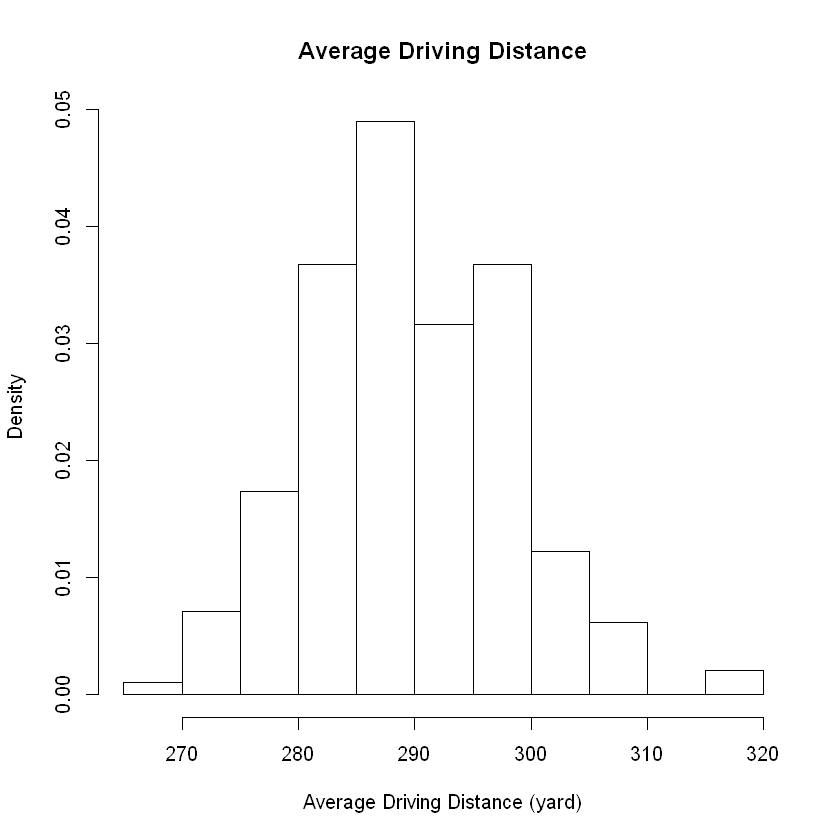

In [67]:
hist(pga$AveDrivingDistance, prob = T, main = 'Average Driving Distance', xlab = 'Average Driving Distance (yard)')

#### (1d) Normal plot of AveDrivingDistance

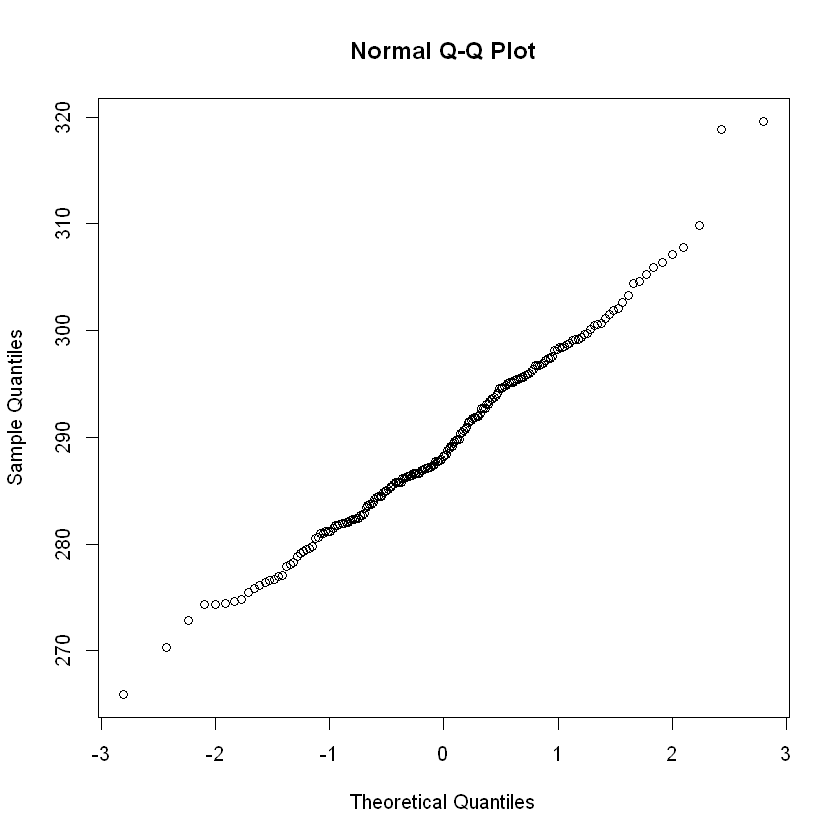

In [68]:
qqnorm(pga$AveDrivingDistance)

#### (1e) Fit a model

##### Normal plot

In [73]:
fit_pga_norm <- fitdist(pga$AveDrivingDistance, "norm")

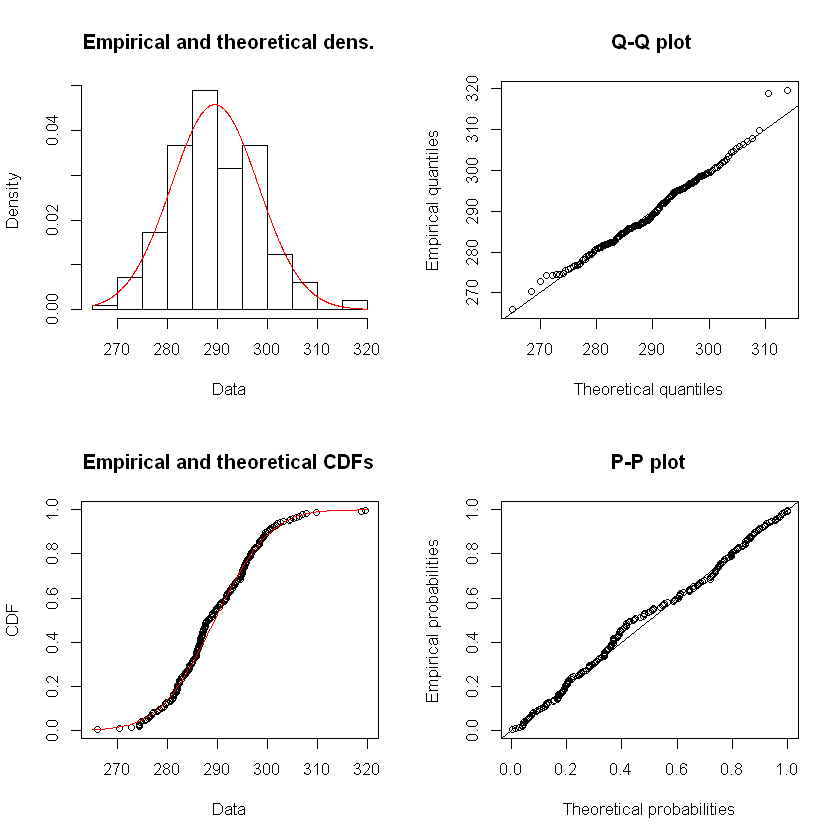

In [76]:
plot(fit_pga_norm)

In [75]:
fit_pga_norm

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
       estimate Std. Error
mean 289.498469  0.6220149
sd     8.708209  0.4398310

#### (1f) 75th percentile of AveDrivingDistance from quantile command

In [77]:
quantile(pga$AveDrivingDistance, 0.75)

75% 
295.525

#### (1g) 75th percentile of AveDrivingDistance from fitted model

In [78]:
qnorm(0.75, 289.498, 8.708)

[1] 295.3715

#### (1h) Bootstrap the 75th percentile